In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *

# single interface

In [82]:
al_r = 3
alpha = [-al_r, al_r]
# alpha = [4, -4]
profile = [0]
ee = 0

junction = RachbaJunction([profile, alpha])

M_tot, vel_factor = junction.get_transfer_matrix(ee)

S = junction.get_scattering_matrix(ee)


ev_coef =  S.evanescent_modes
# ev_coef = junction.evanescent_vell_factor*S.evanescent_modes

scater_matrix_iunfo(S.S)

print(tabulate(ev_coef.real))
print(tabulate(ev_coef.imag))
print("\n")

print(tabulate(S.S.real))
print(tabulate(S.S.imag))
print("\n")


scattering matrix
	real part
--------  --------
0.147959  0.312358
0.312358  0.147959
--------  --------
	immaginary part
----------  ----------
 0.937074   -0.0493197
-0.0493197   0.937074
----------  ----------
inverse vs complex conjugated: True
inverse vs transpose complex conjugated: True



trasmission coefficient: (0,1);(1,0)
0.10000000000000149583
0.10000000000000149991



reflection coefficient:(0,0);(1,1)
0.90000000000001891605
0.9000000000000188765



1.0000000000000204118
1.000000000000020416
1.0000000000000203723
1.000000000000020416
----------  ----------
-0.0615023   1.34187
 1.34187    -0.0615023
----------  ----------
---------  ---------
-0.213394  -0.155619
-0.155619  -0.213394
---------  ---------


--------  --------
0.147959  0.312358
0.312358  0.147959
--------  --------
----------  ----------
 0.937074   -0.0493197
-0.0493197   0.937074
----------  ----------




In [13]:
E = 0
# doesn't work for E_SO in 1e4:1e7 --> too small difference between too large numbers??
# after q is 0 identicly
E_so = 3
# E_so = 

junction.E_so = E_so
junction.prepare_rashba_WF(0, E)
# qq = junction.k_alpha(E, +1, "q")
qq =junction.wave_length[2]
ev_mode = junction.omega_q(0, qq, junction.band[2])
print(junction.band[2])

print(qq[0])
print(ev_mode)
# print(np.linalg.norm(ev_mode[0]), np.linalg.norm(ev_mode[1]))
print(np.angle(ev_mode[0]), np.angle(ev_mode[0])/np.pi)

1
0.999687841294221
[-0.01766663-0.70688605j  0.70710678+0.j        ]
-1.5957833213176746995 -0.50795360738262051146


In [19]:
E = 0
i = 1
E_so = 3
junction.E_so = E_so
junction.prepare_rashba_WF(0, E)
kk = junction.wave_length[i]
ev_mode = junction.omega_k(0, kk, junction.band[i])
print(junction.band[i])

print(kk[0])
print(ev_mode)
# print(np.linalg.norm(ev_mode[0]), np.linalg.norm(ev_mode[1]))
# print(np.angle(ev_mode), np.angle(ev_mode)/np.pi)

-1
-12.041310159761629
[0.0414168 +0.j 0.99914196+0.j]


In [33]:
sig_1 = np.array([[0, 1],[1, 0]])
sig_2 = np.array([[0, -complex(0, 1)],[complex(0,1), 0]])
sig_3 = np.array([[1, 0], [0,1]])

print(np.dot(sig_2, np.array([1, complex(0,1)])))

[-1.+0.j  0.+1.j]


# wavefunction in x

In [112]:
ee = 0
al_r = 8
alpha = [-al_r, al_r]
profile = [0]

junction = RachbaJunction([profile, alpha])
# M_tot, vel_factor = junction.get_transfer_matrix(ee)
S = junction.get_scattering_matrix(ee)

s = 1/np.lib.scimath.sqrt(junction.vel_a).reshape((1, 2))
ev_fact = np.array([s, s])


ev_mode = S.evanescent_modes
print(ev_mode, "\n")

l1 = np.linalg.norm(ev_mode[0,0])**2 + np.linalg.norm(ev_mode[0,1])**2
# l1 = np.lib.scimath.sqrt(np.linalg.norm(ev_mode[0,0])**2*junction.vel_a[0] + np.linalg.norm(ev_mode[0,1])**2*junction.vel_a[1])

l2 = np.linalg.norm(ev_mode[0,1])**2 + np.linalg.norm(ev_mode[1,1])**2
# l2 = np.lib.scimath.sqrt(np.linalg.norm(ev_mode[0,1])**2*junction.vel_a[0] + np.linalg.norm(ev_mode[1,1])**2*junction.vel_a[1])

q_v = np.lib.scimath.sqrt(np.abs(np.array([junction.l_q_vel/l1, junction.r_q_vel/l2])).reshape(2, 1))
# q_v = np.array([junction.l_q_vel/l1, junction.r_q_vel/l2]).reshape(2, 1)



vel_factor_mat = np.dot(q_v, s)

# print(s, q_v)
print(l1, l2)
print(vel_factor_mat)
print("\n")
print(vel_factor_mat*ev_mode)

ev_mode = vel_factor_mat*ev_mode

l11 = np.linalg.norm(ev_mode[0,0])**2 + np.linalg.norm(ev_mode[0,1])**2
l22 = np.linalg.norm(ev_mode[0,1])**2 + np.linalg.norm(ev_mode[1,1])**2
# print(np.sqrt(l11), np.sqrt(l22))
print(l11, l22)
print("\n")

print(junction.l_q_vel/(junction.vel_a[0]))
print(junction.l_q_vel,junction.vel_a[0])

[[-0.00951063-0.08710267j  1.40315338-0.06506743j]
 [ 1.40315338-0.06506743j -0.00951063-0.08710267j]] 

1.9807505019121256573 1.9807505019121256547
[[4.02134978 4.02134978]
 [4.02134978 4.02134978]]


[[-0.03824557-0.35027031j  5.64257053-0.26165888j]
 [ 5.64257053-0.26165888j -0.03824557-0.35027031j]]
32.03121954249371406 32.031219542493714017


-32.031219542493716
-90.73049885555712 2.832564608886993


In [76]:
ev_mode[0,1]/np.sqrt(l11)

(-0.99698875294156640307+0.046232645563197654943j)

In [167]:
ee = 0
al_r = 4
# alpha = [-al_r+4, al_r]
alpha = [-al_r+3, al_r]
# alpha = [4, -4]
profile = [0]

junction = RachbaJunction([profile, alpha])
M_tot, vel_factor = junction.get_transfer_matrix(ee)

S = junction.get_scattering_matrix(ee)
# S.S = 1/vel_factor * S.S
# scater_matrix_iunfo(S.S)

# S.evanescent_modes = vel_factor* S.evanescent_modes
def b_region_WF(x, E, a = [1, 0]):
    
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction.alpha_profile[0]
        
        junction.prepare_rashba_WF(x, E)
        i = 0
        kk = junction.wave_length[i]
        inject_mode = junction.omega_k(x, kk, junction.band[i])
        
        i = 1
        kk = junction.wave_length[i]
        reflected_mode = S.S[0, 0]*junction.omega_k(x, kk, junction.band[i]) 
        #+ S.S[0, 1]*junction.omega_k(x, kk, junction.band[i])
        
        i=2
        kk = junction.wave_length[i]
        ev_mode = S.evanescent_modes[0,0]*junction.omega_q(x, kk, junction.band[i]) 
        #+ S.evanescent_modes[0,1]*junction.omega_q(x, kk, junction.band[i])
        
        res = inject_mode + reflected_mode + ev_mode
        # junction.evanescent_vell_factor*
    elif x > junction.interface[0]:
        junction.E_so = junction.alpha_profile[1]
        junction.prepare_rashba_WF(x, E)
#         i = 1
#         kk = junction.wave_length[i]
        inject_mode = 0#junction.omega_k(x, kk, junction.band[i])
        
        i = 0
        kk = junction.wave_length[i]
        reflected_mode = S.S[1, 0]*junction.omega_k(x, kk, junction.band[i]) 
        #+ S.S[1, 1]*junction.omega_k(x, kk, junction.band[i])
        
        i=3
        kk = junction.wave_length[i]
        scale = junction.evanescent_vell_factor*S.evanescent_modes
        ev_mode = S.evanescent_modes[1,0]*junction.omega_q(x, kk, junction.band[i]) 
        #+ S.evanescent_modes[1,1]*junction.omega_q(x, kk, junction.band[i])
        
        res = inject_mode + reflected_mode + ev_mode
    return res

real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

x_range = np.arange(-1, 1, 0.0001)
for xx in x_range:
    r = b_region_WF(xx, ee)
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)

<IPython.core.display.Javascript object>


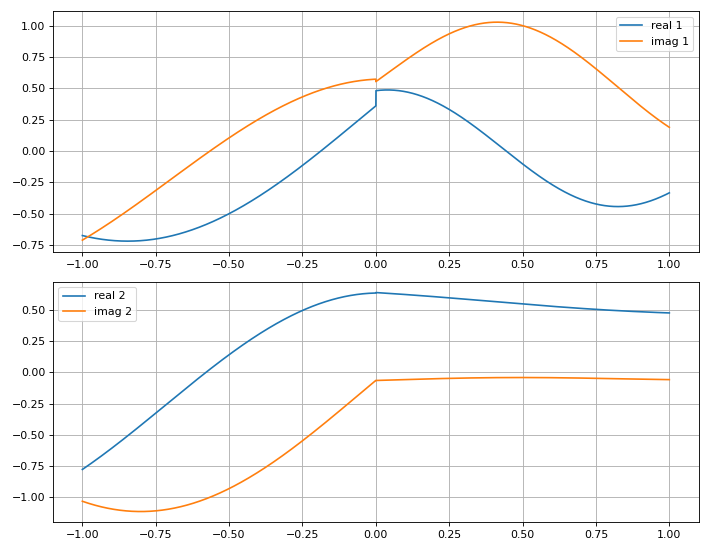

In [168]:
%matplotlib notebook

# plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(9, 7), dpi=100, tight_layout=True, facecolor='white')

axs[0].plot(x_range, real_1, label="real 1")
axs[0].plot(x_range, imag_1, label="imag 1")

axs[1].plot(x_range, real_2, label="real 2")
axs[1].plot(x_range, imag_2, label="imag 2")

# axs[2].plot(x_range, [i+j for i, j in zip(imag_1, imag_2)], label="phase sum")
# axs[2].plot(x_range, [i+j for i, j in zip(real_1, real_2)], label="norm sum")


for i in axs:
    i.legend()
    i.grid(True)
plt.show()

In [17]:
print(vel_factor)

[[1. 1.]
 [1. 1.]]


In [53]:
E = 0
x = 0

al_r = 8
alpha = [al_r-6, al_r]
# alpha = [-al_r, al_r]

profile = [0]

junction = RachbaJunction([profile, alpha])
S = junction.get_scattering_matrix(E)

s = 1/np.lib.scimath.sqrt(junction.vel_a).reshape((1, 2))
ev_fact = np.array([s, s])

M_tot, vel_factor = junction.get_transfer_matrix(ee)

S.evanescent_modes = vel_factor* S.evanescent_modes

junction.E_so = junction.alpha_profile[0]
junction.prepare_rashba_WF(x, E)
i = 0
kk = junction.wave_length[i]
inject_mode = junction.omega_k(x, kk, junction.band[i])
i = 1
kk = junction.wave_length[i]
reflected_mode = S.S[0, 0]*junction.omega_k(x, kk, junction.band[i])
i=2
kk = junction.wave_length[i]
ev_mode = S.evanescent_modes[0,0]*junction.omega_q(x, kk, junction.band[i])
left = inject_mode + reflected_mode + ev_mode

#--------------------
junction.E_so = junction.alpha_profile[1]        
junction.prepare_rashba_WF(x, E)
inject_mode = 0
i = 0
kk = junction.wave_length[i]
reflected_mode = S.S[1, 0]*junction.omega_k(x, kk, junction.band[i])
i=3
kk = junction.wave_length[i]
ev_mode = S.evanescent_modes[1,0]*junction.omega_q(x, kk, junction.band[i])
right = inject_mode + reflected_mode + ev_mode

In [54]:
print(left[0].real, right[0].real, left[0].real - right[0].real)

print(left[0].imag, right[0].imag, left[0].imag - right[0].imag)

print("\n")

print(left[1].real, right[1].real, left[1].real -right[1].real)

print(left[1].imag, right[1].imag, left[1].imag- right[1].imag)

0.82814422005350291273 1.158815197396771381 -0.33067097734326846828
0.04422847851444177912 0.061888535618784461386 -0.017660057104342682265


0.035583170983071266053 0.049791229967271674385 -0.014208058984200408332
-0.11554583814088437992 -0.16168231328711544951 0.04613647514623106959


In [46]:
s = 1/np.lib.scimath.sqrt(junction.vel_a).reshape((1, 2))
ev_fact = np.array([s, s])


[[[0.83141584 0.59416913]]

 [[0.83141584 0.59416913]]] [[0.83141584 0.59416913]]


In [39]:
junction.l_q_vel/junction.vel_a[0]

-32.031219542493716

In [ ]:
# ee = 0
# E_so = -4
# junction[0] = E_so
# junction.prepare_rashba_WF(0, ee)


# E = 0
# i = 1
# E_so = 3
# ind = [i for i, j in enumerate([1,5,10]) if j<3][-1]
# junction.E_so = E_so
# junction.prepare_rashba_WF(0, E)
# kk = junction.wave_length[i]
# ev_mode = junction.omega_k(0, kk, junction.band[i])


        
#         wf = junction.get_boundary_matrix(x, E)[:2,:]
#         res = a[0]*wf[:, 0] + np.dot(S.S, np.array(a))[0]*wf[:, 1] + np.dot(S.evanescent_modes, np.array(a))[0]*wf[:, 2]
#         wf = junction.get_boundary_matrix(x, E)[:2,:]
#         res = a[1]*wf[:, 1] + np.dot(S.S, np.array(a))[1]*wf[:, 0] + np.dot(S.evanescent_modes, np.array(a))[1]*wf[:, 3] 


#     real_1.append(np.linalg.norm(b_region_WF(xx, 0)[0]))#.real)
#     real_2.append(np.linalg.norm(b_region_WF(xx, 0)[1]))#.real)
    
#     imag_1.append(np.angle(b_region_WF(xx,0)[0]))#.imag)
#     imag_2.append(np.angle(b_region_WF(xx,0)[1]))#.imag)

## Multiple interface

In [2]:
hbar = 6.582119569e-16
m = 0.022*cc.m_e
h_xy = 0.2e-2

# E_so = 0.6
# alpha = np.sqrt(E_so*h_xy*2/m)*hbar

k_z = np.sqrt(2*m*h_xy)/hbar

x = 0.1
x_prime =  k_z*x
print(f"k_so {k_z}")
# print(f"alpha {alpha}")

print(f"x' {x_prime}")

print(x/k_z)

k_so 0.01360254171962002
x' 0.0013602541719620021
7.351567233626794


In [2]:
alpha = [8, -0.1, 8]
profile = [-10, 10]

# alpha = [5, -3]
# profile = [0]

junction = RachbaJunction([profile, alpha], logg=True)

# S = junction.get_scatter
ing_matrix(-1.2)
# print(S)
# junction[1] = -5
# M_tot, vel_factor = junction.get_transfer_matrix(-0.5)
# S, _ =  S_rashba_rashba(M_tot)

# S = vel_factor * S
print("\n")
print(np.allclose(np.matmul(S.S.T.conj(), S.S), np.eye(S.S.shape[0]), atol=1e-4))
print("\n inverse")
print(tabulate(set_zeros(np.matmul(S.S.T.conj(), S.S)).real))
print(tabulate(set_zeros(np.matmul(S.S.T.conj(), S.S)).imag))

# # print(np.matmul(S.T.conj(), S))

scater_matrix_iunfo(S.S)

print(S.is_unitary)

# indd = int(S.shape[0]/2)
# t  = S[0:indd, indd:]
# np.linalg.norm(np.trace(np.matmul(t.T.conj(), t)))

NameError: name 'S' is not defined

In [18]:
x = 1
junction.E_so = 0.001#np.finfo(np.float64).eps
# junction.prepare_week_zeeman_WF(10, -0.9)
junction.prepare_zeeman_WF(x, -0.9)

# set_zeros(junction.compile_wave_function(x, -0.9))
junction.compile_wave_function(x, -0.9)

INFO - 	in the gap energy range False, 0
INFO - 	in the gap energy range False, 0


array([[ 3.89183082e-01+5.98785886e-01j,  3.81469611e-01+5.86918161e-01j],
       [ 3.81469611e-01-5.86918161e-01j,  3.89183082e-01-5.98785886e-01j],
       [-5.32860230e+01-4.65842078e+00j,  5.34892618e+01+0.00000000e+00j],
       [-9.31215301e-03+8.14095793e-04j,  9.34767060e-03+0.00000000e+00j]],
      dtype=complex256)

In [19]:
ff = junction.get_boundary_matrix(x, -0.9)

print(ff.dtype)
print(tabulate(ff.real))
print(tabulate(ff.imag))
from scipy import linalg
ff1 = np.array(linalg.inv(ff), dtype = np.complex256)
print(ff1.dtype)

print(tabulate(ff.real))
print(tabulate(ff.imag))

ss = set_zeros(np.matmul(ff1, ff))
print(ss.dtype)
print(tabulate(ss.real))
print(tabulate(ss.imag))

INFO - -->Zeeman regime
INFO - -->Zeeman regime
INFO - 	in the gap energy range False, 0
INFO - 	in the gap energy range False, 0
complex256
--------  ---------  ---------  ------------
0.389183   0.38147   -53.286    -0.00931215
0.38147    0.389183   53.4893    0.00934767
0.110887  -0.132815   -4.72971  -0.000826555
0.132815  -0.110887    1.69148   0.000295599
--------  ---------  ---------  ------------
--------  ---------  ---------  ------------
0.598786  -0.586918   -4.65842   0.000814096
0.586918  -0.598786    0         0
0.170607   0.204346   73.5235   -0.0128488
0.204346   0.170607  -73.6561    0.012872
--------  ---------  ---------  ------------
complex256
--------  ---------  ---------  ------------
0.389183   0.38147   -53.286    -0.00931215
0.38147    0.389183   53.4893    0.00934767
0.110887  -0.132815   -4.72971  -0.000826555
0.132815  -0.110887    1.69148   0.000295599
--------  ---------  ---------  ------------
--------  ---------  ---------  ------------
0.598786  -0

In [5]:
ff.dtype

dtype('complex128')

In [2]:
alpha = [7, -5, 7]
profile = [-10, 10]

junction = RachbaJunction([profile, alpha], [0.2e-2, 0, 0], logg = True)
# junction[1] = -5
M_tot, vel_factor = junction.get_transfer_matrix(0)

S, _ =  S_rashba_rashba(M_tot)

S = vel_factor * S

print(np.matmul(S.T.conj(), S))

# print(np.matmul(S.T.conj(), S))

scater_matrix_iunfo(S)

DEBUG -  1: X_i+ boundary matrix
	E_so = 7.0
	x_i = 10
	alpha sign = 1.0
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	second in the gap energy range
DEBUG - 		rigth lead
DEBUG - 		0: lambda 1, band -1
DEBUG - 		-->b - velcity 2.6508042139670227
DEBUG - 		1: lambda 1, band -1
DEBUG - 		-->a - velcity -2.6508042139670227
DEBUG -  1: X_i- boundary matrix
	E_so = 5.0
	x_i = 10
	alpha sign = -1.0
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	second in the gap energy range
DEBUG -  0: X_i+ boundary matrix
	E_so = 5.0
	x_i = -10
	alpha sign = -1.0
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	second in the gap energy range
DEBUG -  0: X_i- boundary matrix
	E_so = 7.0
	x_i = -10
	alpha sign = 1.0
	h_xy = 0.002
INFO - -->Rashba regime
INFO - 	second in the gap energy range
DEBUG - 		left lead
DEBUG - 		0: lambda 1, band -1
DEBUG - 		-->a - velcity 2.6508042139670227
DEBUG - 		1: lambda 1, band -1
DEBUG - 		-->b - velcity -2.6508042139670227
[[9.99999998e-01+0.00000000e+00j 7.24243197e-08+3.733